# 데이터 분석 및 시각화

# 목차 <br>
- [패턴]
- [종류]
- [상품군]
- [색상]
- [고객 타겟]
- [라인]
- [크리스마스 분석결과]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

art = pd.read_csv("data/articles_processed.csv")            # 상품 메타데이터
cust = pd.read_csv("data/customer_processed.csv")           # 고객 메타데이터
total_revenue = pd.read_csv("data/total_revenue.csv")       # 매출 데이터

In [130]:
# # ---------------------------------------------------------------------
# 분석용 통합 테이블 거래+고객+상품
# 볼수 있는 데이터
# ==  거래(매출, 채널, 날짜, 고객그룹) + 고객속성 + 상품속성
# 가입한 사람이 아닌 소비한 고객을 골라야 하기 때문에 inner 사용
# ---------------------------------------------------------------------

analysis_master = (
    total_revenue
    .merge(cust, on="customer_id", how="inner")
    .merge(art, on="article_id", how="inner")
)
analysis_master.shape

(804149, 27)

In [131]:
analysis_master.head()

,t_dat,customer_id,article_id,revenue,sales_channel_id,month,year_month,month_day,total_revenue,revenue_group,...,prod_name,product_type_info,product_group_name,graphical_appearance_info,perceived_colour_master_info,department_info,index_info,index_group_info,section_info,garment_group_info
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,11,2019-11,11-05,0.227186,top_20,...,ZEBRA CF TVP,Sweater (252),Garment Upper body,Placement print (1010014),Blue (2),Tops Fancy Jersey (1640),Divided (D),Divided (2),Divided Collection (53),Jersey Fancy (1005)
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,5,2019-05,05-22,0.067746,middle,...,BUBBLE WRAP TOP,Top (254),Garment Upper body,Stripe (1010017),White (9),Jersey (1660),Ladieswear (A),Ladieswear (1),Womens Casual (6),Jersey Fancy (1005)
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,5,2019-05,05-10,0.016932,bottom_20,...,Teddy jogger.,Shorts (274),Garment Lower body,Chambray (1010024),Blue (2),Shorts (5658),Menswear (F),Menswear (3),Contemporary Casual (21),Shorts (1025)
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,8,2019-08,08-26,0.033881,middle,...,Yuki shopper,Bag (66),Accessories,Solid (1010016),Black (5),Bags (3209),Ladies Accessories (C),Ladieswear (1),Womens Big accessories (65),Accessories (1019)
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,8,2019-08,08-10,0.028627,middle,...,1pk Sportsock,Socks (302),Socks & Tights,All over pattern (1010001),White (9),Socks Wall (5999),Menswear (F),Menswear (3),Men Underwear (26),Socks and Tights (1021)


In [132]:
analysis_master.columns

Index(['t_dat', 'customer_id', 'article_id', 'revenue', 'sales_channel_id',
       'month', 'year_month', 'month_day', 'total_revenue', 'revenue_group',
       'FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age',
       'age_group', 'product_code', 'prod_name', 'product_type_info',
       'product_group_name', 'graphical_appearance_info',
       'perceived_colour_master_info', 'department_info', 'index_info',
       'index_group_info', 'section_info', 'garment_group_info'],
      dtype='str')

# 크리스마스시즌에 많이 팔리는 특정 색상군, 패턴, 형태, 종류

현재까지 파악한 내용
1. 크리스마스 시즌 구간을 정의한 뒤, 매출 피크가 형성되는 시점을 확인했다.
2. 피크가 발생하는 채널(온라인/오프라인)과 상품군(Product_Type)을 통해 ‘무엇을 어디서’ 팔았는지를 파악했다.
3. 크리스마스는 기능적 수요뿐 아니라 무드 기반 소비가 강한 시즌이므로, 스웨덴 크리스마스 컬러(레드/그린/화이트 톤)가 실제 구매에 반영되는지 확인했다.
4. 마지막으로 Top20/Bottom20 고객군 비교를 통해, 이 시즌/컬러 수요를 주도한 고객이 누구인지와 커뮤니케이션(뉴스/접점)의 연관성을 검증했다.

- 커뮤니케이션(뉴스/접점) - 크리스마스 기간 내에 의 연관성을 보고 판단 V

추가적으로 필요한 요소
- 월-일 단위 데이터(11월, 12월 중 판매 피크 확인)
    - 기간에 따른 할인 시즌 지정
- Top20/Bottom20
    - 크리스마스 시즌 수요를 주도한 고객층을 위한 vip 관리 / 신규 고객 유입 및 기존 고객 유지를 위한 방향성을 제시
커뮤니케이션(뉴스/접점)
    - 크리스마스 기간 내에 의 연관성을 보고 판단

In [133]:
# 실제 분석용 데이터프레임
analysis_christmas = analysis_master[
    [
        # 키
        "customer_id", "article_id",
        # 시간
        "year_month", "month", "month_day",
        # 거래
        "revenue", "sales_channel_id",
        # 고객
        "age_group", "revenue_group", "club_member_status", "FN", "Active", # FN: 뉴스 구독, club_member_status: 팬클럽 가입여부
        # 상품 특성 (크리스마스 분석 핵심)
        "product_group_name", "garment_group_info", "product_type_info",
        "graphical_appearance_info",                 # 패턴
        "perceived_colour_master_info",    
        "section_info", "index_group_info",

    ]
].copy()

In [134]:
analysis_christmas.info()

<class 'pandas.DataFrame'>
RangeIndex: 804149 entries, 0 to 804148
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   customer_id                   804149 non-null  str    
 1   article_id                    804149 non-null  int64  
 2   year_month                    804149 non-null  str    
 3   month                         804149 non-null  int64  
 4   month_day                     804149 non-null  str    
 5   revenue                       804149 non-null  float64
 6   sales_channel_id              804149 non-null  int64  
 7   age_group                     804149 non-null  str    
 8   revenue_group                 804149 non-null  str    
 9   club_member_status            804149 non-null  str    
 10  FN                            804149 non-null  bool   
 11  Active                        804149 non-null  bool   
 12  product_group_name            804149 non-null  str    


## 월간 판매량 분석

In [135]:
monthly_sales = (
    analysis_master
    .groupby("year_month")
    .size()
    .reset_index(name="sales_cnt")
    .sort_values("year_month")
)

monthly_sales

,year_month,sales_cnt
0,2019-01,62538
1,2019-02,56833
2,2019-03,63058
3,2019-04,72620
4,2019-05,76885
5,2019-06,94433
6,2019-07,89331
7,2019-08,61834
8,2019-09,59248
9,2019-10,54530


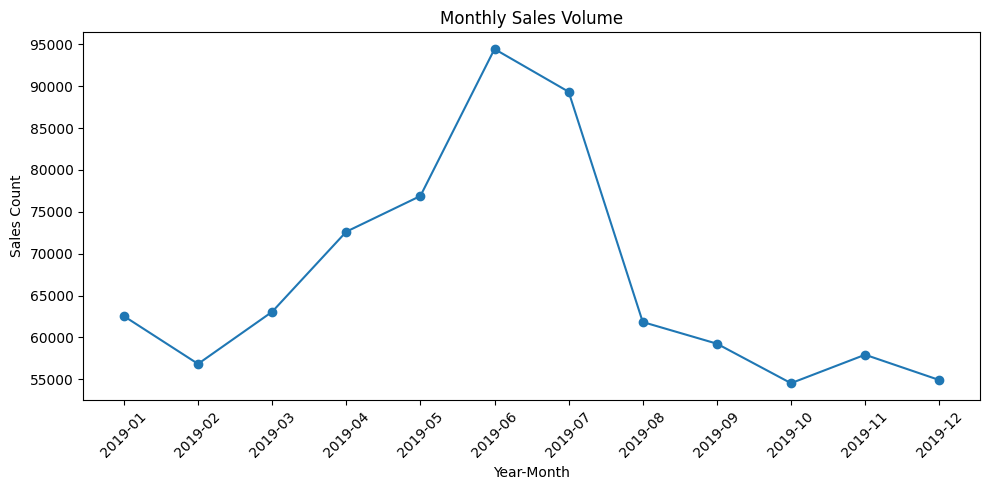

In [136]:
plt.figure(figsize=(10,5))
plt.plot(
    monthly_sales["year_month"],
    monthly_sales["sales_cnt"],
    marker="o"
)

plt.title("Monthly Sales Volume")
plt.xlabel("Year-Month")
plt.ylabel("Sales Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

관측
- 6~7월: 연중 최고 판매량
- 8월 이후: 판매량 급감
- 11~12월: 연중 하위권 판매량 구간
- 10 → 11월: 소폭 반등은 있으나 구조적 회복은 아님

의문점:
- 연말 소비 이벤트가 활발한 시기임에도 불구하고, 11~12월에 상대적으로 낮은 판매량을 기록하고 있다
> 연말 수요가 없는 것이 아닌 **연말 수요를 제대로 흡수하지 못하고 있다**로 판단.

검증해야할것
- 11~12월 실제 구매 데이터 기반으로 잘 팔린 제품 특성 분석

> 실제 구매 데이터 기준으로, 고객들은 해당 시즌에 특정 특성의 제품을 선택하고 있었다 

# 크리스마스 시즌 필터링

In [137]:
analysis_christmas = analysis_master[
    analysis_master["month"].isin([11, 12])
].copy()

## 패턴

### 만약 패턴은 어떨까?
graphical_appearance_info
- Solid / No Pattern
- Printed
- Stripe
- Check
- Graphic Print
- Melange
- Lace
- Jacquard
- Embroidery

등 무늬/패턴 유무와 스타일 표현

In [138]:
# 판매별 구매 비중
pattern_ratio = (
    analysis_christmas
    .groupby("graphical_appearance_info", as_index=False)
    .agg(purchase_cnt=("revenue", "size"))
)

pattern_ratio["purchase_ratio"] = (
    pattern_ratio["purchase_cnt"]
    / pattern_ratio["purchase_cnt"].sum()
)

pattern_ratio = pattern_ratio.sort_values(
    "purchase_ratio", ascending=False
)

pattern_ratio_top10 = pattern_ratio.head(10)
pattern_ratio_top10

,graphical_appearance_info,purchase_cnt,purchase_ratio
24,Solid (1010016),63196,0.560055
14,Melange (1010010),11681,0.103519
0,All over pattern (1010001),9954,0.088214
7,Denim (1010023),5637,0.049956
4,Check (1010004),3860,0.034208
25,Stripe (1010017),2151,0.019063
13,Lace (1010021),1911,0.016936
11,Glittering/Metallic (1010009),1910,0.016927
20,Other structure (1010026),1841,0.016315
12,Jacquard (1010022),1572,0.013931


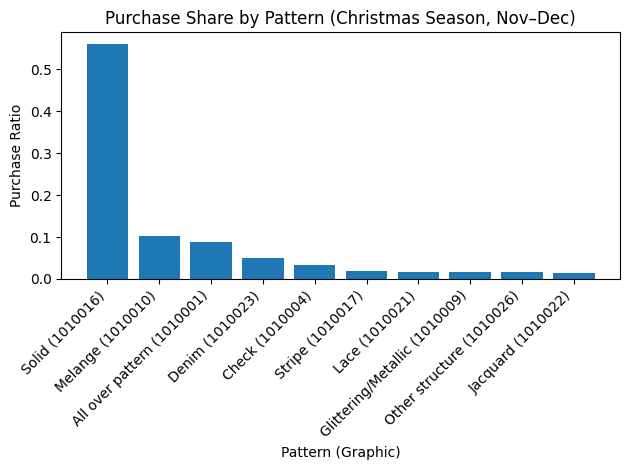

In [139]:
plt.figure()
plt.bar(
    pattern_ratio_top10["graphical_appearance_info"],
    pattern_ratio_top10["purchase_ratio"]
)
plt.title("Purchase Share by Pattern (Christmas Season, Nov–Dec)")
plt.xlabel("Pattern (Graphic)")
plt.ylabel("Purchase Ratio")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 그냥 잘 팔리는 제품 아닌가?

In [140]:
# 1) 크리스마스 시즌(11~12월)에서 가장 많이 팔린 패턴 Top 5
top5_patterns = (
    analysis_christmas["graphical_appearance_info"]
    .value_counts()
    .head(5)
    .index
)

# 2) 전체 기간에서 Top 5 패턴 거래만 추출
pattern_all = analysis_master[
    analysis_master["graphical_appearance_info"].isin(top5_patterns)
].copy()

# 3) 월별 패턴 구매 횟수(분자)
pattern_month_cnt = (
    pattern_all
    .groupby(["year_month", "graphical_appearance_info"])
    .size()
    .reset_index(name="purchase_cnt")
)

# 4) 월별 전체 구매 횟수(분모)
monthly_total = (
    analysis_master
    .groupby("year_month")
    .size()
    .reset_index(name="total_cnt")
)

# 5) 월별 구매 비중 계산
pattern_month_ratio = pattern_month_cnt.merge(monthly_total, on="year_month", how="left")

pattern_month_ratio["purchase_ratio"] = (
    pattern_month_ratio["purchase_cnt"] / pattern_month_ratio["total_cnt"]
)

# 6) 그래프용 테이블 (월 x 패턴)
pattern_trend = (
    pattern_month_ratio
    .pivot(index="year_month", columns="graphical_appearance_info", values="purchase_ratio")
    .sort_index()
    .fillna(0)
)

pattern_trend

graphical_appearance_info,All over pattern (1010001),Check (1010004),Denim (1010023),Melange (1010010),Solid (1010016)
year_month,,,,,
2019-01,0.109469,0.018549,0.067367,0.082014,0.529694
2019-02,0.122376,0.016258,0.078212,0.056675,0.527246
2019-03,0.134337,0.013987,0.067351,0.044055,0.538552
2019-04,0.171303,0.007890,0.059391,0.031741,0.527968
2019-05,0.182923,0.006178,0.053183,0.028250,0.531612
2019-06,0.207322,0.006396,0.054822,0.027014,0.512639
2019-07,0.180665,0.009314,0.058043,0.030079,0.538425
2019-08,0.142042,0.024226,0.064916,0.049520,0.567811
2019-09,0.097269,0.038195,0.064998,0.091058,0.582214


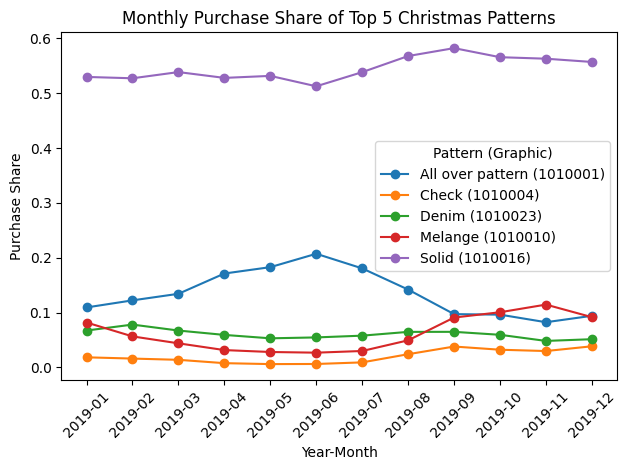

In [141]:
# 8) (그래프) 월별 구매 비중 추이
plt.figure()
for col in pattern_trend.columns:
    plt.plot(
        pattern_trend.index,
        pattern_trend[col],
        marker="o",
        label=col
    )
plt.title("Monthly Purchase Share of Top 5 Christmas Patterns")
plt.xlabel("Year-Month")
plt.ylabel("Purchase Share")
plt.xticks(rotation=45)
plt.legend(title="Pattern (Graphic)")
plt.tight_layout()
plt.show()

### 분석결과

- Solid는 원래부터 잘 팔리는 패턴
- Denim은 여름 시즌에 강세
- Melange는 겨울시즌, 11~12월에 ‘뚜렷한 상승’세를 보인다
- Check 패턴은 소수지만 ‘연말 반등’
- All over pattern은 ‘여름 중심 → 연말 하락’

11~12월에 많이 팔린 패턴들이 모두 크리스마스 시즌 특화 패턴은 아니며, 일부 패턴은 연중 안정적인 판매 비중을 유지하는 반면, Melange 및 Check 패턴은 연말 시즌에 상대적으로 선호도가 증가하는 경향을 보였다.

## 종류

### 종류는 어떨까?
product_type_info
1. product_type_info: 스웨터/니트/드래스 같은 파악이 가능하기 때문에 선택
- Dress
- Sweater
- Trousers

In [142]:
# 크리스마스 시즌 product_type Top 10 (표)
type_summary = (
    analysis_christmas
    .groupby("product_type_info")
    .size()
    .reset_index(name="purchase_cnt")
    .sort_values("purchase_cnt", ascending=False)
)
type_summary.head(10)


,product_type_info,purchase_cnt
82,Sweater (252),19476
91,Trousers (272),15272
24,Dress (265),10710
89,Top (254),5503
13,Bra (306),5340
9,Blouse (258),4805
86,T-shirt (255),4293
97,Underwear bottom (286),4100
76,Skirt (275),3614
50,Leggings/Tights (273),3066


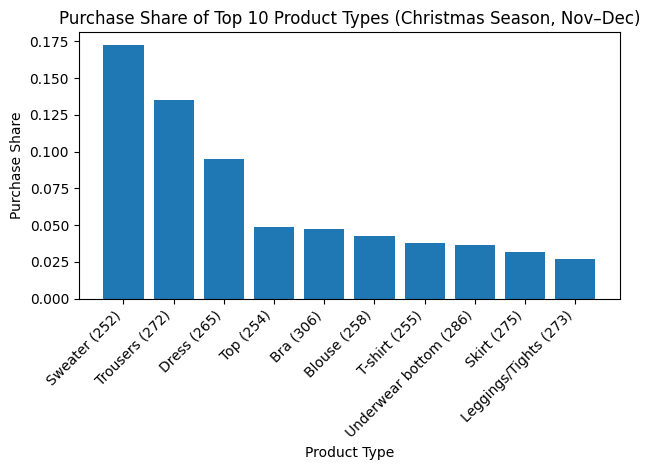

In [143]:
type_summary["purchase_ratio"] = type_summary["purchase_cnt"] / type_summary["purchase_cnt"].sum()
type_top10_ratio = type_summary.head(10)

plt.figure()
plt.bar(type_top10_ratio["product_type_info"], type_top10_ratio["purchase_ratio"])
plt.title("Purchase Share of Top 10 Product Types (Christmas Season, Nov–Dec)")
plt.xlabel("Product Type")
plt.ylabel("Purchase Share")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [144]:
# 크리스마스 시즌 Top 5 product_type_info 선정
top5_types = (
    analysis_christmas["product_type_info"]
    .value_counts()
    .head(5)
    .index
)

top5_types


Index(['Sweater (252)', 'Trousers (272)', 'Dress (265)', 'Top (254)',
       'Bra (306)'],
      dtype='str', name='product_type_info')

### 그냥 잘 팔리는 제품 아닌가?

In [145]:
# 전체 기간에서 Top5 종류만 뽑고 월별 비중 계산

type_all = analysis_master[
    analysis_master["product_type_info"].isin(top5_types)
].copy()

type_month_cnt = (
    type_all
    .groupby(["year_month", "product_type_info"])
    .size()
    .reset_index(name="purchase_cnt")
)

monthly_total = (
    analysis_master
    .groupby("year_month")
    .size()
    .reset_index(name="total_cnt")
)

type_month_ratio = type_month_cnt.merge(monthly_total, on="year_month", how="left")
type_month_ratio["purchase_ratio"] = type_month_ratio["purchase_cnt"] / type_month_ratio["total_cnt"]

type_trend = (
    type_month_ratio
    .pivot(index="year_month", columns="product_type_info", values="purchase_ratio")
    .sort_index()
    .fillna(0)
)

type_trend.head()


product_type_info,Bra (306),Dress (265),Sweater (252),Top (254),Trousers (272)
year_month,,,,,
2019-01,0.047171,0.057309,0.144632,0.045924,0.159103
2019-02,0.040047,0.070857,0.100135,0.055795,0.165309
2019-03,0.037029,0.088506,0.071062,0.056440,0.160265
2019-04,0.032278,0.120366,0.028353,0.052506,0.126687
2019-05,0.037081,0.119048,0.024868,0.046849,0.109306


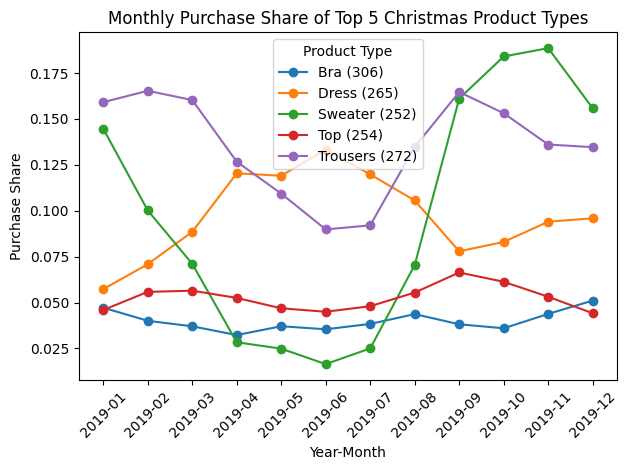

In [146]:
plt.figure()
for col in type_trend.columns:
    plt.plot(
        type_trend.index,
        type_trend[col],
        marker="o",
        label=col
    )

plt.title("Monthly Purchase Share of Top 5 Christmas Product Types")
plt.xlabel("Year-Month")
plt.ylabel("Purchase Share")
plt.xticks(rotation=45)
plt.legend(title="Product Type")
plt.tight_layout()
plt.show()

### 분석결과

- Sweater
    - 6~7월 저점이나 9월부터 급격히 상승 10~11월 최고치
    - 12월에도 하락하나 높은 수준을 유지한다.
> 겨울 시즌성 + 크리스마스 시즌 특화 상품 보온성과 연말 활용도가 반영된 결과로 보이며, 이는 시즌 판매 상품으로 적당하다 판단된다.

- Dress
    - 봄~여름까지 점진적 상승 5~6월 고점
    - 9월 이후 다시 상승
    - 11~12월 안정적으로 높은 비중을 차지함
> 연말 모임, 행사 등과 연관되어 크리스마스 시즌에 수요가 유지되거나 소폭 증가하는 상품군으로 해석할 수 있다.

- Trousers는 연중 강세지만, 연말에는 상대적 약화
    - 1~3월, 9월에 비중이 높음, 11~12월에는 상대적으로 하락
> Trousers는 연중 꾸준히 판매되는 상시 상품이나, 크리스마스 시즌에 특화된 상품으로 판매하긴 어렵다

- Bra와 Top은 시즌 영향이 제한적? 이라ㅎ고 해야하나....

크리스마스 시즌에 많이 판매되는 상품 형태를 월별 구매 비중으로 분석한 결과, Sweater와 Dress는 연말 시즌에 수요가 증가하는 경향을 보였으며, <br>특히 Sweater는 크리스마스 시즌 특화 상품으로 확인되었다. 반면 Trousers, Bra, Top은 연중 비교적 안정적인 구매 패턴을 보여 시즌성 영향이 제한적인 상품군으로 나타났다.

## 상품군

### 상품군은 어떨까?
garment_group_info

In [147]:
garment_summary = (
    analysis_christmas
    .groupby("garment_group_info")
    .size()
    .reset_index(name="purchase_cnt")
    .sort_values("purchase_cnt", ascending=False)
)

garment_summary.head(10)


,garment_group_info,purchase_cnt
7,Knitwear (1003),17851
6,Jersey Fancy (1005),14806
18,"Under-, Nightwear (1017)",13210
16,Trousers (1009),10696
5,Jersey Basic (1002),9624
0,Accessories (1019),8375
3,Dresses Ladies (1013),7368
1,Blouses (1010),6975
13,Socks and Tights (1021),5072
17,Trousers Denim (1016),3949


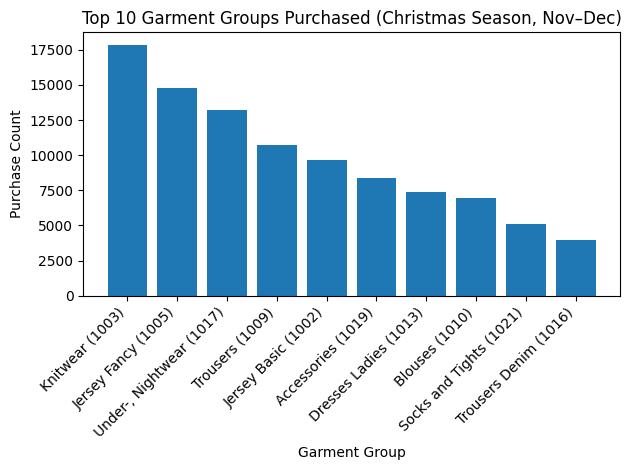

In [148]:
# Top 10 garment_group_info 막대그래프 (구매 횟수)
garment_top10 = garment_summary.head(10)

plt.figure()
plt.bar(
    garment_top10["garment_group_info"],
    garment_top10["purchase_cnt"]
)
plt.title("Top 10 Garment Groups Purchased (Christmas Season, Nov–Dec)")
plt.xlabel("Garment Group")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 그냥 잘 팔리는 제품 아닌가?

In [149]:
# 크리스마스 Top 5 garment_group_info 월별 구매비중 추이
# Top 5 garment_group_info 선정
top5_garments = (
    analysis_christmas["garment_group_info"]
    .value_counts()
    .head(5)
    .index
)

# 전체 기간에서 Top 5만 추출
garment_all = analysis_master[
    analysis_master["garment_group_info"].isin(top5_garments)
].copy()

# 월별 구매 비중 계산
garment_month_cnt = (
    garment_all
    .groupby(["year_month", "garment_group_info"])
    .size()
    .reset_index(name="purchase_cnt")
)

monthly_total = (
    analysis_master
    .groupby("year_month")
    .size()
    .reset_index(name="total_cnt")
)

garment_month_ratio = garment_month_cnt.merge(
    monthly_total,
    on="year_month",
    how="left"
)

garment_month_ratio["purchase_ratio"] = (
    garment_month_ratio["purchase_cnt"]
    / garment_month_ratio["total_cnt"]
)

garment_trend = (
    garment_month_ratio
    .pivot(
        index="year_month",
        columns="garment_group_info",
        values="purchase_ratio"
    )
    .sort_index()
    .fillna(0)
)


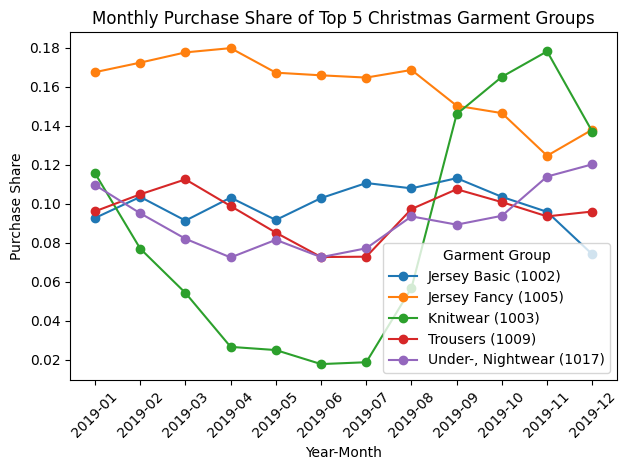

In [150]:
plt.figure()
for col in garment_trend.columns:
    plt.plot(
        garment_trend.index,
        garment_trend[col],
        marker="o",
        label=col
    )

plt.title("Monthly Purchase Share of Top 5 Christmas Garment Groups")
plt.xlabel("Year-Month")
plt.ylabel("Purchase Share")
plt.xticks(rotation=45)
plt.legend(title="Garment Group")
plt.tight_layout()
plt.show()


### 분석결과

- Knitwear
    - 6~7월 구매 비중이 가장 낮아 연중 저점을 형성한다.
    - 8월부터 빠르게 상승하기 시작하여 9~11월 급격한 증가를 보인다.
    - 11월 최고치를 기록한 후, 12월에도 높은 수준을 유지한다.
    
> 전형적인 겨울 시즌성 상품군으로, 보온성과 계절 수요가 명확하게 반영된 결과이다. 특히 9월 이후 급격한 상승은 크리스마스 및 연말 시즌 소비와 직접적으로 연결된 것으로 해석할 수 있으며, 크리스마스 시즌 핵심 전략 상품군으로 적합하다 판단된다.

- Jersey Basic
    - 연중 비교적 안정적인 구매 비중을 유지한다.
    - 6~9월 소폭 상승하며, 9월에 가장 높은 수준을 보인다.
    - 10월 이후 하락세를 보이며 12월에는 연중 최저 수준에 근접한다.

> 기본 이너웨어 성격의 상품군으로, 계절이나 이벤트보다는 상시 소비 목적이 강한 것으로 해석된다. 때문에 크리스마스 시즌 특화 상품으로 활용하기에는 적합성이 낮다 판단된다

- Jersey Fancy
    - 1~4월 높은 구매 비중을 유지하며, 상반기 전반에 강세를 보이고 여름철(6~7월) 소폭 하락 후 8월 반등한다.
    - 9월 이후 지속적으로 감소하여 11~12월에는 연중 최저 수준을 기록한다.

> 디자인 요소가 강조된 저지류로 판단되며, 계절성보다는 데일리·캐주얼 수요 중심 상품군으로 보인다. 크리스마스 시즌과의 직접적인 연관성은 제한적인 것으로 판단된다.

- Trousers
    - 연중 구매 비중 변동 폭이 크지 않다.
> 하의류 특성상 계절 이벤트보다는 실용적 소비가 중심인 상품군으로 보인다. 크리스마스 시즌 특화 상품보다는 상시 판매 유지 전략이 적합하다 판단된다.

- Underwear / Nightwear
    - 상반기에는 비교적 낮은 수준을 유지하다, 9월 이후 점진적으로 상승하여 12월에 연중 최고점에 도달한다.

> 선물 수요 및 연말 소비 증가의 영향을 받은 것으로 해석된다. 크리스마스 시즌에 맞춘 상품 전략에 활용 가능성이 높은 상품군으로 판단된다.

크리스마스 시즌에 대한 월별 구매 비중 분석 결과, Knitwear와 Underwear/Nightwear는 연말 시즌에 수요가 뚜렷하게 증가하는 상품군으로 확인되었다. 특히 Knitwear는 9월 이후 급격한 상승과 11월 최고치를 기록하며,
크리스마스 시즌 특화 핵심 상품군으로 분류할 수 있다.

반면 Jersey Basic, Jersey Fancy, Trousers는 연중 비교적 안정적인 구매 패턴을 보이며
시즌성 이벤트의 영향은 제한적인 것으로 나타났다.

## 색상

### 색상군은 어떨까?
- perceived_colour_master_info

In [151]:
# 색상별 구매 비중 (Christmas 시즌)
color_ratio = (
    analysis_christmas
    .groupby("perceived_colour_master_info", as_index=False)
    .agg(purchase_cnt=("revenue", "size"))
)

color_ratio["purchase_ratio"] = (
    color_ratio["purchase_cnt"]
    / color_ratio["purchase_cnt"].sum()
)

color_ratio = color_ratio.sort_values(
    "purchase_ratio", ascending=False
)

color_ratio_top10 = color_ratio.head(10)

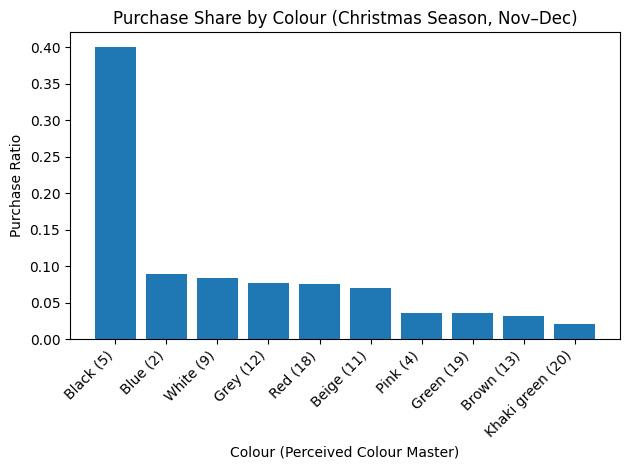

In [152]:
plt.figure()
plt.bar(
    color_ratio_top10["perceived_colour_master_info"],
    color_ratio_top10["purchase_ratio"]
)
plt.title("Purchase Share by Colour (Christmas Season, Nov–Dec)")
plt.xlabel("Colour (Perceived Colour Master)")
plt.ylabel("Purchase Ratio")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 그냥 잘 팔리는 제품 아닌가?

In [153]:
# 크리스마스 시즌 Top 5 색상(perceived_colour_master_info) 선정
top5_colours = (
    analysis_christmas["perceived_colour_master_info"]
    .value_counts()
    .head(5)
    .index
)

top5_colours


Index(['Black (5)', 'Blue (2)', 'White (9)', 'Grey (12)', 'Red (18)'], dtype='str', name='perceived_colour_master_info')

In [154]:
# 전체 기간에서 Top5 색상만 뽑고 월별 구매 비중 계산

type_all = analysis_master[
    analysis_master["perceived_colour_master_info"].isin(top5_colours)
].copy()

type_month_cnt = (
    type_all
    .groupby(["year_month", "perceived_colour_master_info"])
    .size()
    .reset_index(name="purchase_cnt")
)

monthly_total = (
    analysis_master
    .groupby("year_month")
    .size()
    .reset_index(name="total_cnt")
)

type_month_ratio = type_month_cnt.merge(
    monthly_total,
    on="year_month",
    how="left"
)

type_month_ratio["purchase_ratio"] = (
    type_month_ratio["purchase_cnt"]
    / type_month_ratio["total_cnt"]
)

type_trend = (
    type_month_ratio
    .pivot(
        index="year_month",
        columns="perceived_colour_master_info",
        values="purchase_ratio"
    )
    .sort_index()
    .fillna(0)
)

type_trend.head()


perceived_colour_master_info,Black (5),Blue (2),Grey (12),Red (18),White (9)
year_month,,,,,
2019-01,0.362468,0.150852,0.092728,0.058029,0.098612
2019-02,0.342213,0.166558,0.067866,0.050657,0.120705
2019-03,0.334517,0.169637,0.052396,0.055282,0.138238
2019-04,0.306954,0.162338,0.046750,0.054875,0.161815
2019-05,0.303518,0.148846,0.038278,0.052377,0.179476


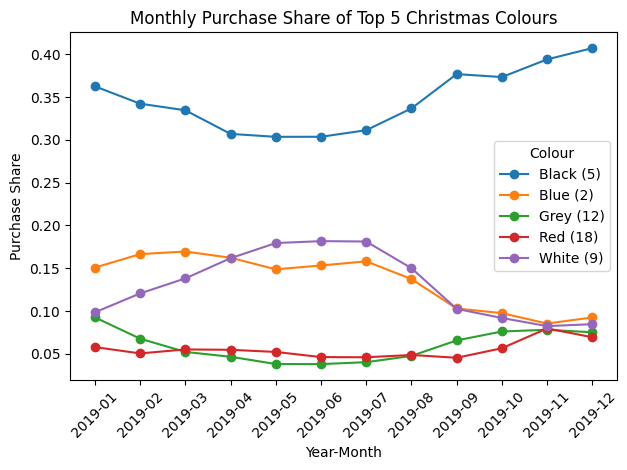

In [155]:
plt.figure()

for col in type_trend.columns:
    plt.plot(
        type_trend.index,
        type_trend[col],
        marker="o",
        label=col
    )

plt.title("Monthly Purchase Share of Top 5 Christmas Colours")
plt.xlabel("Year-Month")
plt.ylabel("Purchase Share")
plt.xticks(rotation=45)
plt.legend(title="Colour")
plt.tight_layout()
plt.show()


## 고객 타겟

### 고객 타겟 파악
- index_group_info

In [156]:
index_group_summary = (
    analysis_christmas
    .groupby("index_group_info")
    .size()
    .reset_index(name="purchase_cnt")
    .sort_values("purchase_cnt", ascending=False)
)

index_group_summary


,index_group_info,purchase_cnt
2,Ladieswear (1),72411
1,Divided (2),25173
3,Menswear (3),8340
4,Sport (26),3736
0,Baby/Children (4),3179


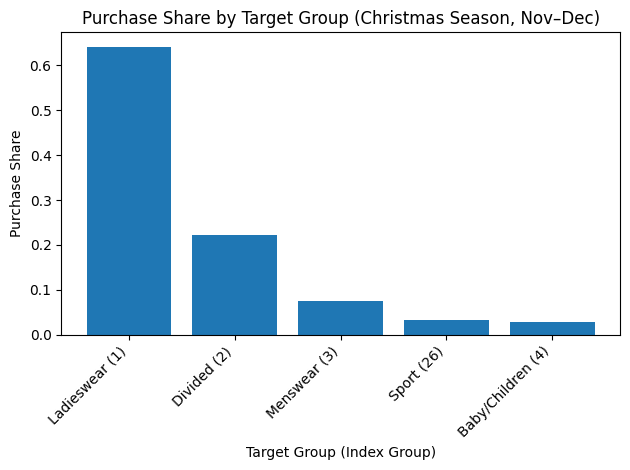

In [157]:
index_group_summary["purchase_ratio"] = (
    index_group_summary["purchase_cnt"]
    / index_group_summary["purchase_cnt"].sum()
)

plt.figure()
plt.bar(
    index_group_summary["index_group_info"],
    index_group_summary["purchase_ratio"]
)
plt.title("Purchase Share by Target Group (Christmas Season, Nov–Dec)")
plt.xlabel("Target Group (Index Group)")
plt.ylabel("Purchase Share")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 그냥 잘 팔리는 제품 아닌가?

In [158]:
# 월별 × 고객타겟 구매 횟수 집계
index_month_cnt = (
    analysis_master
    .groupby(["year_month", "index_group_info"])
    .size()
    .reset_index(name="purchase_cnt")
)

# 그래프용 테이블로 변환 (pivot)
index_trend = (
    index_month_cnt
    .pivot(
        index="year_month",
        columns="index_group_info",
        values="purchase_cnt"
    )
    .sort_index()
    .fillna(0)
)


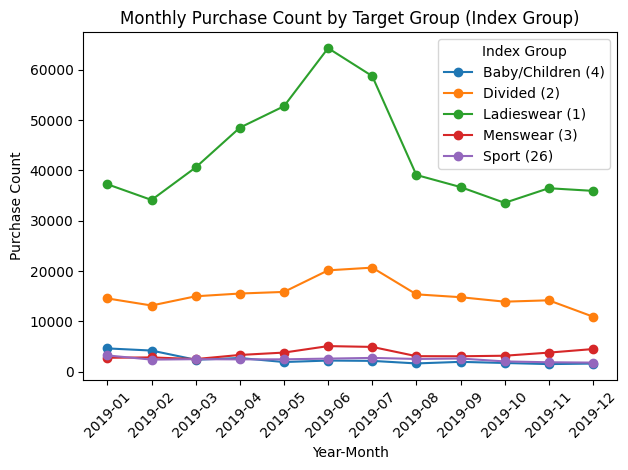

In [159]:
plt.figure()
for col in index_trend.columns:
    plt.plot(
        index_trend.index,
        index_trend[col],
        marker="o",
        label=col
    )

plt.title("Monthly Purchase Count by Target Group (Index Group)")
plt.xlabel("Year-Month")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45)
plt.legend(title="Index Group")
plt.tight_layout()
plt.show()


### 분석결과

- Baby / Children
    - 1~3월 비교적 높은 구매 건수를 보이나 이후 점진적으로 감소한다.
    - 6~7월 이후 하락세가 뚜렷하며, 10~12월에는 연중 최저 수준을 유지한다.
    
> 아동복 특성으로 인해 연말 이벤트성 소비와의 연관성은 낮은 것으로 해석되며 크리스마스 시즌 주력 타겟으로 삼기에는 적합도가 낮다 판단된다.

- Divided
    - 상반기(1~7월) 구매 건수가 꾸준히 증가하다 6~7월에 최고치를 기록한다.
    - 이후 8월부터 감소하고 10~12월에는 하락세가 이어진다.
    
> 캐주얼·트렌디 소비 중심 타겟으로, 여름 시즌 수요가 강하게 반영된 결과로 확인된다.  크리스마스 시즌 주력 타겟으로 삼기에는 적합도가 낮다 판단된다.

- Ladieswear
    - 1~6월 지속적인 상승을 보이며, 6월에 연중 최고치를 기록한다.
    - 7월 이후 급격히 감소하나, 10~12월에도 일정 수준의 구매 건수를 유지한다
    
> 전체 매출을 견인하는 핵심 타겟 그룹으로, 연말 시즌에도 기본 수요가 안정적으로 유지된다. 크리스마스 시즌 특화 상품 기획 시 가장 우선적으로 고려해야 할 주력 고객군으로 판단된다.

- Menswear
    - 상반기 점진적으로 증가하여 6월에 소폭 최고치를 기록하다 이후 감소한다.
    - 10월 이후 다시 상승하는 흐름을 보이며 11~12월에는 연말 소비 회복이 관찰된다.
> 연말 선물 수요 및 시즌성 소비가 반영된 것으로 해석된다. 크리스마스 시즌 한정 기획, 선물형 상품 구성에 적합한 타겟 그룹으로 판단된다.

- Sport
    - 연중 구매 건수 변동 폭이 크지 않다.
> 운동·기능성 중심 소비 특성으로 인해 계절 이벤트의 영향이 제한적인 그룹으로 크리스마스 시즌과의 직접적인 연관성은 낮다 판단된다.

크리스마스 시즌 기준으로 타겟 고객군의 구매 패턴을 분석한 결과, Ladieswear와 Menswear는 연말 시즌에도 비교적 안정적인 구매 건수를 유지하거나 회복하는 경향을 보였다. 특히 Menswear는 10월 이후 반등 흐름이 나타나며, 연말 선물 수요와 연관된 크리스마스 시즌 타겟 그룹으로 해석할 수 있다.<br>
또한 Ladieswearsms 전체 매출을 견인하는 핵심 타겟 그룹으로 Ladieswear를 중심으로 한 핵심 매출 유지 전략을 수립하는것이 타당하다.

## 라인

### 라인분석
- section_info

In [160]:
# 크리스마스 시즌 section별 구매 횟수 (표)
section_summary = (
    analysis_christmas
    .groupby("section_info")
    .size()
    .reset_index(name="purchase_cnt")
    .sort_values("purchase_cnt", ascending=False)
)

section_summary.head(10)


,section_info,purchase_cnt
43,Womens Everyday Collection (15),25130
12,Divided Collection (53),13234
45,Womens Lingerie (61),8976
51,Womens Tailoring (11),8226
46,"Womens Nightwear, Socks & Tigh (62)",7373
11,Divided Basics (51),4161
42,Womens Everyday Basics (16),3799
41,Womens Casual (6),3514
26,Ladies H&M Sport (5),3486
25,Ladies Denim (57),3166


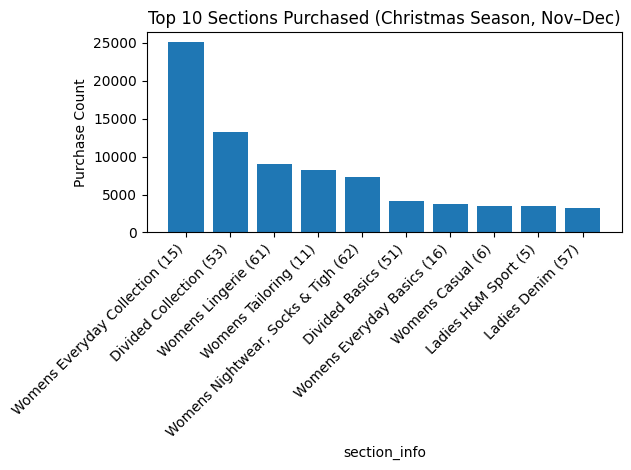

In [161]:
section_top10 = section_summary.head(10)

plt.figure()
plt.bar(
    section_top10["section_info"],
    section_top10["purchase_cnt"]
)
plt.title("Top 10 Sections Purchased (Christmas Season, Nov–Dec)")
plt.xlabel("section_info")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 그냥 잘 팔리는 제품 아닌가?

In [162]:
# 크리스마스 시즌 Top 5 section 선정
top5_sections = (
    analysis_christmas["section_info"]
    .value_counts()
    .head(5)
    .index
)

# 전체 기간에서 Top 5 section만 추출
section_all = analysis_master[
    analysis_master["section_info"].isin(top5_sections)
].copy()

# 월별 구매 횟수 집계
section_month_cnt = (
    section_all
    .groupby(["year_month", "section_info"])
    .size()
    .reset_index(name="purchase_cnt")
)



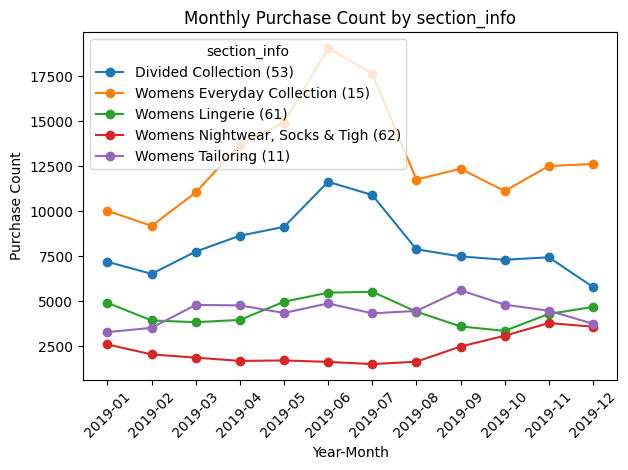

In [163]:
# 그래프용 테이블 + 시계열 그래프
section_trend = (
    section_month_cnt
    .pivot(
        index="year_month",
        columns="section_info",
        values="purchase_cnt"
    )
    .sort_index()
    .fillna(0)
)

plt.figure()
for col in section_trend.columns:
    plt.plot(
        section_trend.index,
        section_trend[col],
        marker="o",
        label=col
    )

plt.title("Monthly Purchase Count by section_info")
plt.xlabel("Year-Month")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45)
plt.legend(title="section_info")
plt.tight_layout()
plt.show()


### 분석결과

- Divided Collection
    - 1~6월까지 점진적인 증가세를 보이며, 6월에 최고치를 기록한다.
    - 허나 7월 이후 급격히 감소하여 10~12월에는 낮은 수준을 유지한다.
> 캐주얼·트렌디 소비 중심 섹션으로, 여름 시즌 수요가 강하게 반영된 결과이다.

- Womens Everyday Collection
    - 전 기간 동안 가장 높은 구매 건수를 기록한다.
    - 3~7월 지속적인 상승으로 6~7월 최고치를 형성하다 8월 이후로 감소한다.
    - 10~12월에서 안정적인 구매 건수를 유지한다.

> 여성 일상복 수요를 담당하는 핵심 섹션으로, 시즌 변화에도 기본 수요가 유지되는 구조이기 때문에 크리스마스 시즌에는 주력 유지형 상품군으로 적합하다 판단된다.

- Womens Lingerie
    - 상반기 완만한 상승 후 6~7월 고점을 형성한다.
    - 8~10월 하락세를 보이나, 11~12월 다시 반등한다.

> 연말 선물 수요 및 시즌성 소비가 반영된 흐름으로 해석된다. 크리스마스 시즌 기프트 세트, 패키지 상품 구성에 적합한 섹션으로 판단된다.

- Womens Nightwear, Socks & Tights
    - 상반기 낮은 구매 건수를 유지하다. 9월 이후 뚜렷한 상승세를 보인다.
    - 이후 11~12월에 연중 최고 수준에 도달한다.
> 보온성·실내 착용 목적 수요가 연말 시즌에 집중된 것으로 해석된다. 크리스마스 시즌 특화 섹션으로 가장 명확한 시즌성을 보인다.

- Womens Tailoring
    - 연중 구매 건수 변동 폭이 크지 않으며 9월에 소폭 상승하나, 이후 다시 감소한다.
> 시즌 이벤트보다는 상시 소비 성향이 강한 것으로 보인다. 크리스마스 시즌 집중 전략엔 적합하지 않다고 판단된다.

크리스마스 시즌 기준으로 월별 구매 건수 분석 결과, Womens Nightwear, Socks & Tights와 Womens Lingerie는 크리스마스 시즌에 구매 건수가 뚜렷하게 증가하는 섹션으로 확인되었다. 특히 Nightwear, Socks & Tights는 9월 이후 지속적인 상승과 11~12월 최고치를 기록하며 연말·크리스마스 시즌 특화 핵심 섹션으로 분류할 수 있다.

# 

# 크리스마스 분석결과

제품 특성
- 패턴 (graphical)
- 제품 종류 (product_type)
- 상품군 (garment_group)

고객 타겟
- index_group

라인/운영 관점
- section

> "무엇을 팔 것인가 / 누구에게 팔 것인가 / 어디에 배치할 것인가"

## 패턴 (graphical_appearance_info) 분석 결과
관찰
- Solid: 연중 가장 높은 비중 유지
- All over pattern: 4~6월 상승, 9월 이후 하락
- Melange: 9월 이후 뚜렷한 상승

해석
- 크리스마스 시즌(11~12월)에 → 화려한 패턴보다 "톤이 안정된 소재·질감 중심" 선호
- 멜란지 상승 → 따뜻함 / 소재감 / 겨울 이미지를 반영한 선택 가능성

> "크리스마스 시즌 = 강한 패턴"이라는 통념을 데이터로 반박 가능? 모르겠다

## 제품 종류 (product_type_info) 분석 결과
관찰
- Sweater: 9~11월 급격한 상승, 11월 최고치
- Dress: 연말에도 일정 비중 유지
- Trousers: 여름 저점 → 가을 회복

해석
- 스웨터는 명확한 계절·연말 시즌성 상품
- 드레스는: 연말 모임 / 행사 수요 반영
- - Bra와 Top은 ?


## 상품군 (Garment Group) 분석 결과
관찰
- Knitwear: 여름 최저, 9~11월 급상승
- Jersey Fancy: 연중 높지만 11월 하락
- Under/Nightwear: 11~12월 상승

해석
- 보온성 + 홈웨어 + 연말 휴식 흐름이 명확
- 크리스마스 시즌: "외출용 화려함"보단, 따뜻함·편안함·선물 적합성이 반영된 상품 선택

> 패턴 분석 결과랑 서로 논리적으로 맞물림

## 고객 타겟 (index_group_info)
관찰
- Ladieswear: 절대적 구매량 1위(매출을 이끌어가는 집단) 여름 피크 후 하락
- Divided: 연중 안정적
- Menswear: Menswear:

해석
- 남성 고객 구매 증가 → 선물 수요 가능성



## 라인 분석 (section_info)
관찰
- Womens Everyday: 연중 가장 안정적
- Womens Nightwear: 9월 이후 상승
- Tailoring: 연말 반등

해석
- 크리스마스 시즌: 데일리 + 홈웨어 + 단정한 외출복



# 크리스마스 논리구조 되짚어보기
1. 11~12월 전체 판매량 부진 확인
2. 해당 시즌 실제 구매 데이터 분석
3. 구매된 제품의 공통 특성 도출
4. “이 시즌에 고객은 이런 상품을 선택하고 있었다”
→ 상품 기획 / 광고 / 노출 전략 제안

# 겨울시즌 판매량이 부진한 이유?
11~2월 을 겨울시즌으로

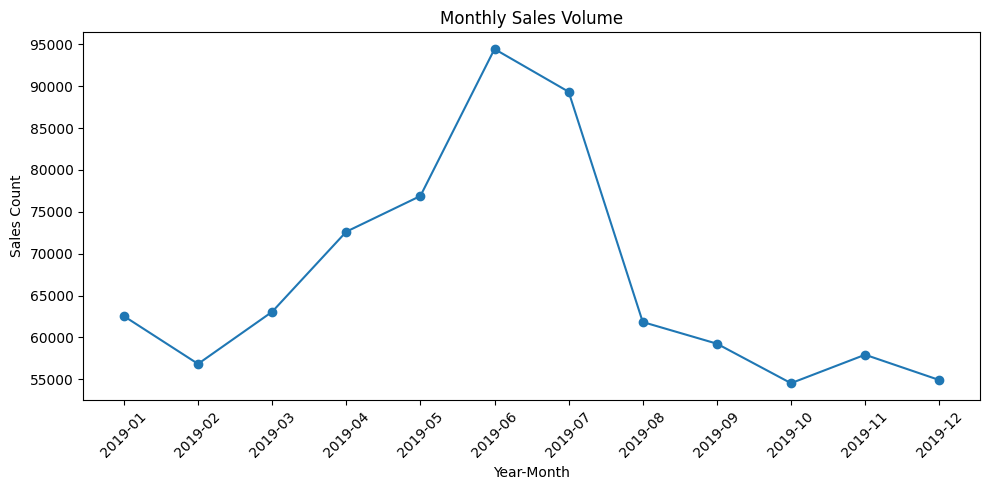

In [164]:
plt.figure(figsize=(10,5))
plt.plot(
    monthly_sales["year_month"],
    monthly_sales["sales_cnt"],
    marker="o"
)

plt.title("Monthly Sales Volume")
plt.xlabel("Year-Month")
plt.ylabel("Sales Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## (A) 상품 문제인가?
> 겨울 시즌 핵심 상품이 부족했을 가능성이 있다.

## (B) 가격 문제인가?
> 

## (C) 고객 문제인가?

## (D) 운영/노출 문제인가?